# Task 06 - Logistic regression
## Pattern Recognition and Machine Learning

In [2]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from logreg import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### load data

In [84]:
data = np.load("data_logreg.npz", allow_pickle=True)
tst = data["tst"].item()
trn = data["trn"].item()

## Classification of letters A and C
#### compute features

In [85]:
# prepare training data
train_X, _ = compute_measurements(trn['images'])
train_X = np.vstack((np.ones(np.shape(train_X)), train_X))
# train_X = np.vstack((train_X, np.ones(np.shape(train_X))))

#### Training - gradient descent of the logistic loss function

In [4]:
w_init = np.array([1.75, 3.4])
epsilon = 1e-2
[w, wt, Et] = logistic_loss_gradient_descent(train_X, trn['labels'], w_init, epsilon)
print('w: ', w, '\nwt: ', wt, '\nEt: ', Et)

w:  [1.8343074 3.3190428] 
wt:  [[1.75       1.75997171 1.77782062 1.80593719 1.83779008 1.84398609
  1.8343074 ]
 [3.4        3.39233974 3.37848624 3.35614129 3.32899079 3.31724604
  3.3190428 ]] 
Et:  [0.25867973 0.25852963 0.25830052 0.25804515 0.25791911 0.25791612
 0.25791452]


In [5]:
# Start at a fixed point:
w_init = np.array([-7, -8], dtype=np.float64)
# or start at a random point:
# w_init = 20 * (rand(size(train_X, 1), 1) - 0.5)
epsilon = 1e-2
[w, wt, Et] = logistic_loss_gradient_descent(train_X, trn['labels'], w_init, epsilon)

#### Plot the progress of the gradient descent

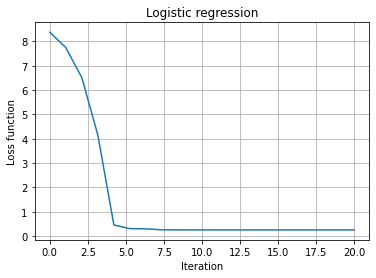

In [6]:
plt.figure()
plt.plot(np.linspace(0,20,20), Et)
plt.title('Logistic regression')
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.grid('on')
plt.savefig('E_progress_AC.png')

/Users/karinabalagazova/Desktop/cvut/5.semestr/RPZ/assigments/6_logreg/logreg.py:144: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(W1, W2, L, cmap='viridis', vmin=z_min, vmax=z_max, edgecolor='k')


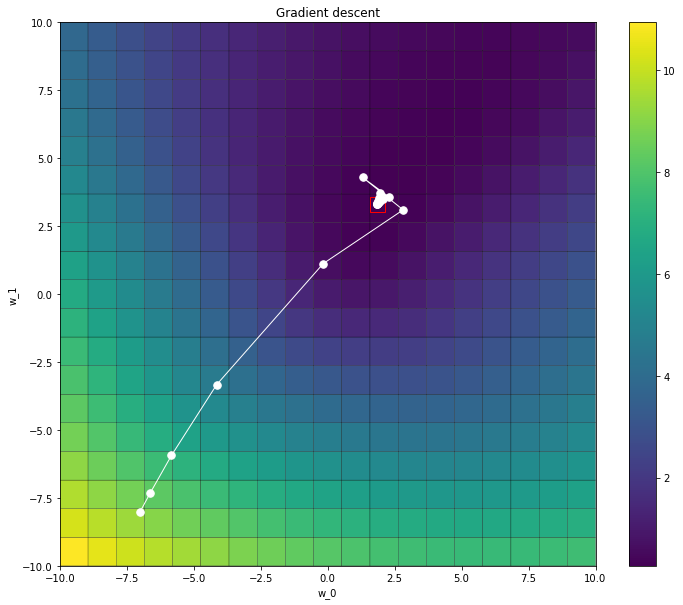

In [7]:
# you can change this:
plot_gradient_descent(train_X, trn['labels'], logistic_loss, w, wt, Et)
plt.savefig('w_progress_2d_AC.png')

In [8]:
# Load test letter data
testX, _ = compute_measurements(tst['images'])
testX = np.vstack((np.ones(np.shape(testX)), testX))

# Classify letter test data and calculate classification error
classifiedLabels = classify_images(testX, w)

errors = tst['labels'] != classifiedLabels
testError = np.sum(errors, dtype=np.float64) / errors.size
print('Letter classification error: {:.2f}%'.format(testError * 100))

Letter classification error: 6.50%


In [10]:
thr = get_threshold(w)
print(thr)

-0.5550182386190822


#### Visualize classification results

/Users/karinabalagazova/Desktop/cvut/5.semestr/RPZ/assigments/6_logreg/logreg.py:178: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  thr = get_threshold(w)
/Users/karinabalagazova/Desktop/cvut/5.semestr/RPZ/assigments/6_logreg/logreg.py:179: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


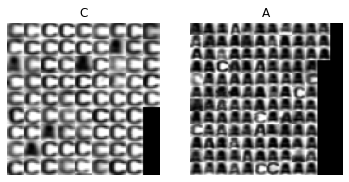

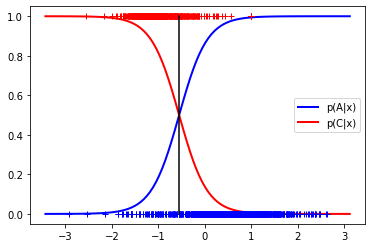

In [33]:
show_classification(tst['images'], classifiedLabels, 'CA')
plt.savefig('classif_AC.png')

# show the aposteriori probabilities
plot_aposteriori(train_X, trn['labels'], w)
plt.savefig('aposteriori.png')

## Classification of MNIST digits
#### init

In [24]:
# Load training data
data = np.load("mnist_trn.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]


In [25]:
# Add x0 = 1 (for the bias term)
X = np.vstack((np.ones(np.shape(X)[1]), X))
# Training - gradient descent of the logistic loss function

np.random.seed(1) # to get the same example outputs
w_init = np.random.rand(X.shape[0])
epsilon = 1e-2

In [26]:
w, _, Et = logistic_loss_gradient_descent(X, y, w_init, epsilon)

#### visualise

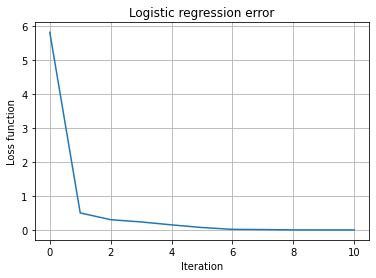

In [27]:
# Plot the progress of the gradient descent
plt.figure()
plt.plot(np.linspace(0,10,11), Et)
plt.title('Logistic regression error')
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.grid('on')
plt.savefig('E_progress_MNIST.png')

## Classify MNIST test data and calculate classification error
#### init

In [20]:
# Load test data
data = np.load("mnist_tst.npz", allow_pickle=True)
X, y, imsize = data["X"], data["y"], data["imsize"]

X = np.vstack((np.ones(np.shape(X)[1]), X))

In [21]:
# Classify MNIST test data and calculate classification error
classifiedLabels = classify_images(X, w)
errors = np.abs(classifiedLabels - y) > 0
testError = np.sum(errors, dtype=np.float64) / errors.size
print('MNIST digit classification error: {:.2f}%'.format(testError * 100))

MNIST digit classification error: 0.10%


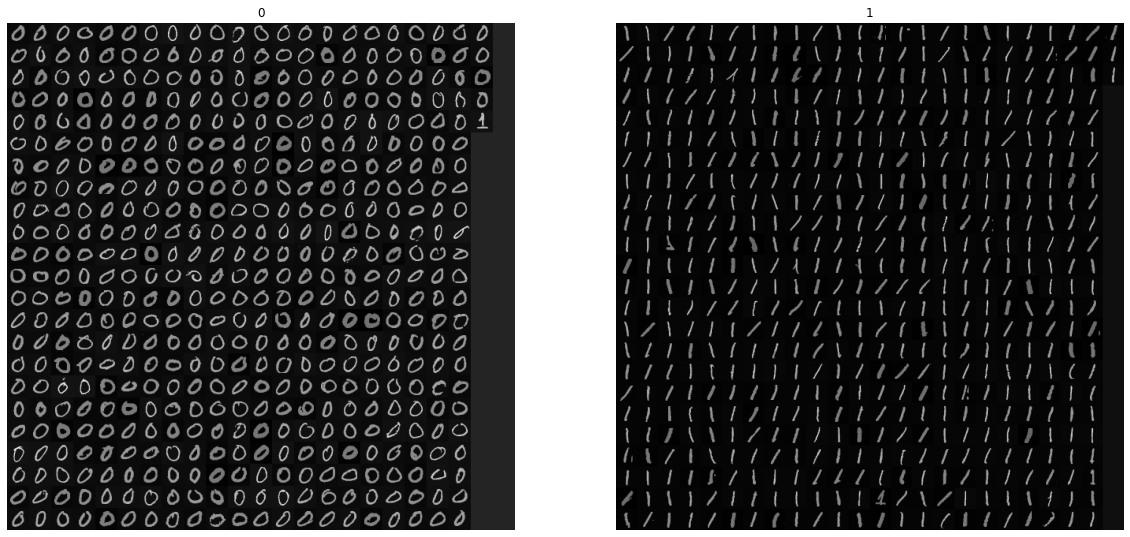

In [22]:
# Visualize classification results
show_mnist_classification(X[1:, :], classifiedLabels, imsize)
plt.savefig('classif_MNIST.png')

Because of our choice of image features, we now have a weight for each pixel (+ 1 bias term), allowing the following visualization. We can now intuitively explain how the decisions are made.

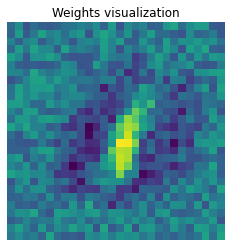

In [23]:
w_img = w[:-1].reshape(imsize)
plt.imshow(w_img)
plt.axis('off')
plt.title('Weights visualization')
plt.savefig('weight_image.png')


## Bonus

In [4]:
data = np.load("my_data.npz", allow_pickle=True)
x = data['X']
labels = data['y']

In [269]:
x0 = x[labels==0]/5
x1 = x[labels==1]/5

alpha0 = 8 * np.ones(7)
alpha1 = -2
x_range = np.linspace(0, 2)
offset = -2

In [270]:
alpha1 = -1.9
plt.figure(figsize=(5, 4))
for i in range(1,8):
    plt.plot(x_range, np.arctan(alpha0 * x_range + -0.25 + alpha1 * i))

plt.scatter(x0, np.zeros(x0.size) + offset + 0.1, s=80, facecolors='#56FF48', edgecolors='w')
plt.scatter(x1, np.zeros(x1.size) + offset + 0.2, s=80, facecolors='#FF67C6', edgecolors='w')

plt.ylim(-2, 2)

ValueError: operands could not be broadcast together with shapes (7,) (50,) 

<Figure size 360x288 with 0 Axes>

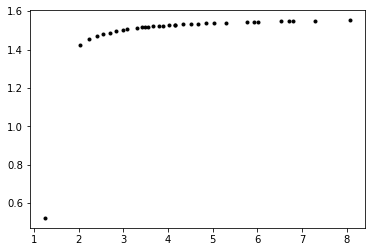

In [264]:
Z = np.zeros((7, x.size))
for i in range(7):
    Z[i] = np.arctan(alpha0*x + alpha1 * (i + 1))

# train_Z = np.vstack((np.ones(x.size), Z))
train_Z = Z
plt.plot(x, Z[4, :], 'k.')

In [265]:
# Start at a fixed point:
# w_init = np.zeros(7, dtype=np.float64)
# w_init[1] = 1
w_init = np.array([1, 2, -1.2, -1.8, 5, -0.5, -1], dtype=np.float64)
# or start at a random point:
# w_init = 20 * (rand(size(train_X, 1), 1) - 0.5)
epsilon = 1e-3
[w, wt, Et] = logistic_loss_gradient_descent(train_Z, labels, w_init, epsilon)

[3.93809296 4.93273646 1.72630701 1.11840699 7.90839317 2.39513257
 1.87636538]


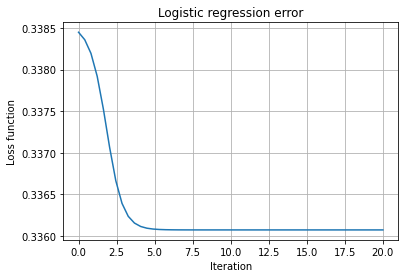

In [266]:
plt.figure()
plt.plot(np.linspace(0,20,Et.size), Et)
plt.title('Logistic regression error')
plt.xlabel('Iteration')
plt.ylabel('Loss function')
plt.grid('on')
plt.savefig('E_progress_MNIST.png')
print(wt[:,-1])

(-15.0, 15.0)

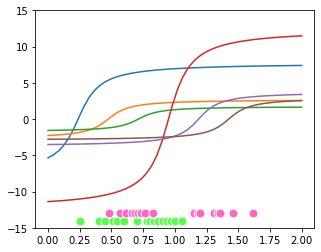

In [267]:
offset = -15
plt.figure(figsize=(5, 4))
for i in range(1,7):
    plt.plot(x_range, w[i] * np.arctan(alpha0*x_range + alpha1 * i))
plt.scatter(x0, np.zeros(x0.size) + offset + 1, s=80, facecolors='#56FF48', edgecolors='w')
plt.scatter(x1, np.zeros(x1.size) + offset + 2, s=80, facecolors='#FF67C6', edgecolors='w')
plt.ylim(-15, 15)

(-15.0, 15.0)

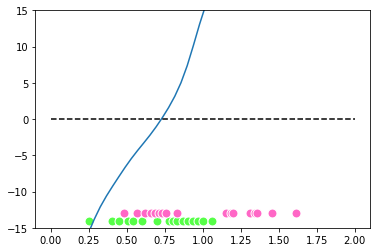

In [268]:
Z_ = np.zeros((7, x_range.size))

for i in range(7):
    Z_[i] = w[i] * np.arctan(alpha0*x_range + alpha1 * (i))

new_Z = np.sum(Z_, axis=0)
plt.plot(x_range, new_Z)
plt.plot(x_range, np.zeros(x_range.size), 'k--')

plt.scatter(x0, np.zeros(x0.size) + offset + 1, s=80, facecolors='#56FF48', edgecolors='w')
plt.scatter(x1, np.zeros(x1.size) + offset + 2, s=80, facecolors='#FF67C6', edgecolors='w')
plt.ylim(-15, 15)